In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
compas = pd.read_csv('data/cox-violent-parsed.csv')
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [10]:
compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'], format='mixed')
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'], format='mixed')

compas['v_screening_date'] = pd.to_datetime(compas['v_screening_date'], format='mixed')
compas['vr_offense_date'] = pd.to_datetime(compas['vr_offense_date'], format='mixed')

compas['c_offense_date'] = pd.to_datetime(compas['c_offense_date'], format='mixed')
compas['c_arrest_date'] = pd.to_datetime(compas['c_arrest_date'], format='mixed')

compas['compas_screening_date'] = pd.to_datetime(compas['compas_screening_date'], format='mixed')

ValueError: time data '13/08/2013 6:03' does not match format 'mixed' (match)

In [ ]:
compas = compas.drop(['first','last','c_case_number','c_charge_degree', 'c_charge_desc', 'r_case_number','r_charge_degree','vr_case_number','vr_charge_degree','start','end','event'],axis=1)

#remove row with nan scores 
compas = compas.loc[compas['score_text'].notnull()]
#clean out the "-1" decile score from dataset 
compas = compas.loc[compas['v_decile_score'] != -1]

#label encodimg
compas['sex'] = compas['sex'].replace({'Male': 1, 'Female': 0})
compas['score_text'] = compas['score_text'].replace({'Low':0, 'Medium':1, 'High': 2})

#days in jail
compas['jail_out- jail_in'] = (compas['c_jail_out'] - compas['c_jail_in']).dt.days

In [4]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

In [5]:
compas.describe(include=["object","category"]).T

,count,unique,top,freq
name,18316,10855,brandon ross,13
first,18316,3876,michael,421
last,18316,5635,williams,239
compas_screening_date,18316,703,20/03/2013,72
sex,18316,2,Male,14933
dob,18316,7485,21/11/1991,21
age_cat,18316,3,25 - 45,10372
race,18316,6,African-American,9791
c_jail_in,17019,9806,04/02/2013 7:24,13
c_jail_out,17019,8714,30/04/2013 7:29,19


In [6]:
compas.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11001.0,5501.000000,3175.859490,1.0,2751.0,5501.0,8251.0,11001.0
age,18316.0,34.019273,11.667811,18.0,25.0,31.0,41.0,96.0
juv_fel_count,18316.0,0.076873,0.464272,0.0,0.0,0.0,0.0,20.0
decile_score,18316.0,4.997052,2.937569,-1.0,2.0,5.0,8.0,10.0
juv_misd_count,18316.0,0.098439,0.517639,0.0,0.0,0.0,0.0,13.0
juv_other_count,18316.0,0.124263,0.524537,0.0,0.0,0.0,0.0,17.0
priors_count,18316.0,3.913191,5.299864,0.0,0.0,2.0,5.0,43.0
days_b_screening_arrest,17019.0,4.302485,81.159881,-597.0,-1.0,-1.0,0.0,1057.0
c_days_from_compas,17449.0,57.694596,317.994694,0.0,1.0,1.0,2.0,9485.0
is_recid,18316.0,0.414774,0.576449,-1.0,0.0,0.0,1.0,1.0


In [7]:
compas_race = compas['race'].value_counts()
compas_race

African-American    9791
Caucasian           6086
Hispanic            1451
Other                860
Asian                 71
Native American       57
Name: race, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'African-American'),
  Text(1, 0, 'Caucasian'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'Native American')])

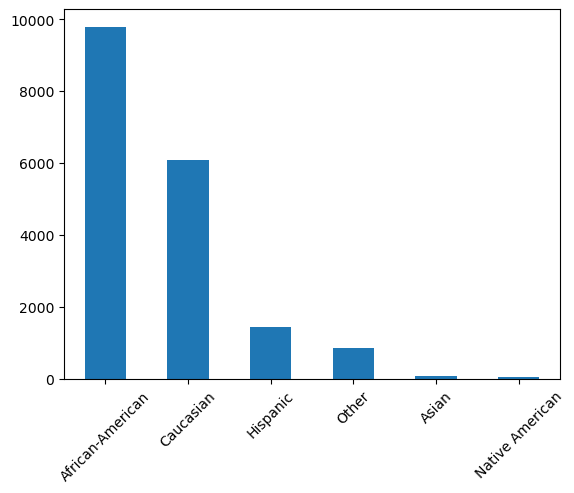

In [8]:
compas['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, '25 - 45'),
  Text(1, 0, 'Less than 25'),
  Text(2, 0, 'Greater than 45')])

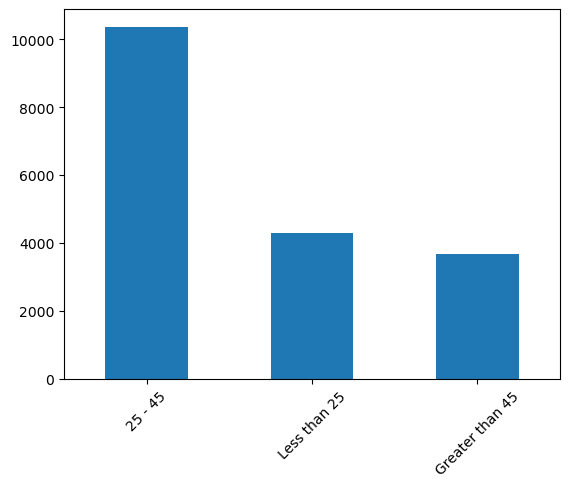

In [9]:
compas['age_cat'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

In [11]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18293 entries, 0 to 18315
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10987 non-null  float64       
 1   name                     18293 non-null  object        
 2   compas_screening_date    18293 non-null  datetime64[ns]
 3   sex                      18293 non-null  int64         
 4   dob                      18293 non-null  object        
 5   age                      18293 non-null  int64         
 6   age_cat                  18293 non-null  object        
 7   race                     18293 non-null  object        
 8   juv_fel_count            18293 non-null  int64         
 9   decile_score             18293 non-null  int64         
 10  juv_misd_count           18293 non-null  int64         
 11  juv_other_count          18293 non-null  int64         
 12  priors_count             18293 non-nu

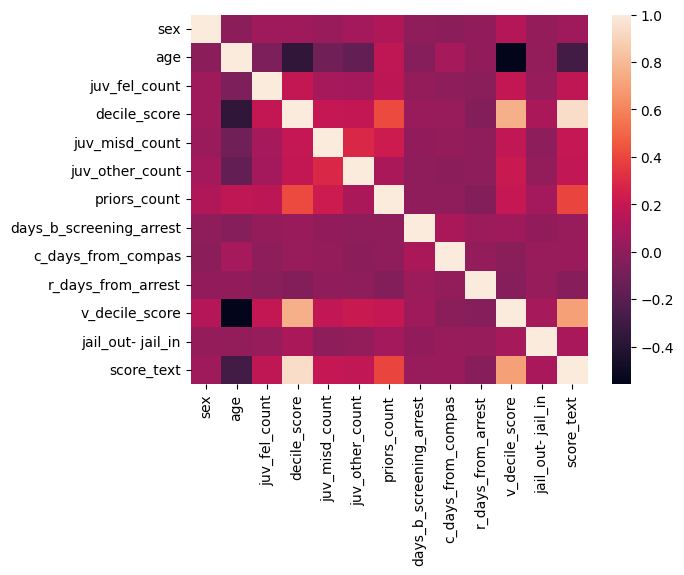

In [12]:
corr_matrix = compas[['sex', 'age','juv_fel_count', 'decile_score', 
                    'juv_misd_count','juv_other_count','priors_count', 
                    'days_b_screening_arrest', 'c_days_from_compas', 'r_days_from_arrest', 'v_decile_score', 'jail_out- jail_in','score_text' ]].corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [13]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,sex,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,r_days_from_arrest,v_decile_score,jail_out- jail_in,score_text
sex,1.000000,-0.006042,0.060368,0.051776,0.042168,0.068553,0.111336,0.005980,-0.012325,0.011362,0.138176,0.020809,0.056466
age,-0.006042,1.000000,-0.063011,-0.362236,-0.106335,-0.160345,0.177380,-0.031528,0.085158,0.007731,-0.559341,0.017512,-0.280872
juv_fel_count,0.060368,-0.063011,1.000000,0.185831,0.086160,0.068121,0.170462,0.021138,0.000184,-0.021365,0.185683,0.025773,0.177001
decile_score,0.051776,-0.362236,0.185831,1.000000,0.192673,0.185624,0.412462,0.041527,0.037559,-0.040150,0.759669,0.100220,0.940490
juv_misd_count,0.042168,-0.106335,0.086160,0.192673,1.000000,0.287710,0.224690,0.012093,0.020740,0.005634,0.180579,-0.002963,0.191646
juv_other_count,0.068553,-0.160345,0.068121,0.185624,0.287710,1.000000,0.097845,0.003668,-0.010757,-0.003184,0.212833,0.015588,0.180124
priors_count,0.111336,0.177380,0.170462,0.412462,0.224690,0.097845,1.000000,0.002149,0.005389,-0.038437,0.190978,0.074050,0.393327
days_b_screening_arrest,0.005980,-0.031528,0.021138,0.041527,0.012093,0.003668,0.002149,1.000000,0.093758,0.046573,0.050956,0.011221,0.032964
c_days_from_compas,-0.012325,0.085158,0.000184,0.037559,0.020740,-0.010757,0.005389,0.093758,1.000000,0.014772,-0.018501,0.032745,0.039670
r_days_from_arrest,0.011362,0.007731,-0.021365,-0.040150,0.005634,-0.003184,-0.038437,0.046573,0.014772,1.000000,-0.033346,0.026075,-0.026904


In [14]:
compas.head()

,id,name,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,jail_out- jail_in
0,1.0,miguel hernandez,2013-08-14,1,18/04/1947,69,Greater than 45,Other,0,1,...,0,14/08/2013,Risk of Violence,1,Low,2013-08-14,07/07/2014,14/07/2014,0,0.0
1,2.0,miguel hernandez,2013-08-14,1,18/04/1947,69,Greater than 45,Other,0,1,...,0,14/08/2013,Risk of Violence,1,Low,2013-08-14,07/07/2014,14/07/2014,0,0.0
2,3.0,michael ryan,2014-12-31,1,06/02/1985,31,25 - 45,Caucasian,0,5,...,1,31/12/2014,Risk of Violence,2,Low,2014-12-31,30/12/2014,03/01/2015,0,NaN
3,4.0,kevon dixon,2013-01-27,1,22/01/1982,34,25 - 45,African-American,0,3,...,0,27/01/2013,Risk of Violence,1,Low,2013-01-27,26/01/2013,05/02/2013,0,96.0
4,5.0,ed philo,2013-04-14,1,14/05/1991,24,Less than 25,African-American,0,4,...,0,14/04/2013,Risk of Violence,3,Low,2013-04-14,16/06/2013,16/06/2013,4,1.0


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


compas['reoffend'] = compas['v_decile_score'].apply(lambda x: 1 if x > 5 else 0)

# Selecting features and target
features = compas[['age', 'priors_count']]
target = compas['reoffend']

# Splitting the data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(train_features, train_target)

# Making predictions
predicted_classes = model.predict(test_features)

# Evaluating the model
accuracy = accuracy_score(test_target, predicted_classes)
report = classification_report(test_target, predicted_classes)
conf_matrix = confusion_matrix(test_target, predicted_classes)

report

'              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87      2631\n           1       0.70      0.60      0.64      1033\n\n    accuracy                           0.81      3664\n   macro avg       0.77      0.75      0.76      3664\nweighted avg       0.81      0.81      0.81      3664\n'

In [13]:
# Reformatting the classification report for better readability
from tabulate import tabulate

# Converting the classification report into a dictionary
report_dict = classification_report(test_target, predicted_classes, output_dict=True)

# Preparing data for tabulation
report_data = []
for key, value in report_dict.items():
    if key == 'accuracy':
        report_data.append(['accuracy', '', '', value, report_dict['macro avg']['support']])
    elif key in ['macro avg', 'weighted avg']:
        report_data.append([key, value['precision'], value['recall'], value['f1-score'], value['support']])
    else:
        report_data.append([f'Class {key}', value['precision'], value['recall'], value['f1-score'], value['support']])

# Creating a table with headers
headers = ["Metric", "Precision", "Recall", "F1-Score", "Support"]
table = tabulate(report_data, headers, tablefmt="pretty")

# Printing the formatted table
print(table)



+--------------+--------------------+--------------------+--------------------+---------+
|    Metric    |     Precision      |       Recall       |      F1-Score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|   Class 0    | 0.8513172140021653 | 0.8966172557962752 | 0.873380229544613  | 2631.0  |
|   Class 1    | 0.6954087346024636 | 0.601161665053243  | 0.6448598130841121 | 1033.0  |
|   accuracy   |                    |                    | 0.8133187772925764 | 3664.0  |
|  macro avg   | 0.7733629743023145 | 0.7488894604247591 | 0.7591200213143625 | 3664.0  |
| weighted avg | 0.8073615755687887 | 0.8133187772925764 | 0.8089529396418571 | 3664.0  |
+--------------+--------------------+--------------------+--------------------+---------+


In [16]:
# Example data
new_data = pd.DataFrame({
    'age': [25, 40],
    'priors_count': [10, 0]
})

# Making predictions
predictions = model.predict(new_data)

# Interpreting predictions
prediction_labels = ['Likely to reoffend' if pred == 1 else 'Less likely to reoffend' for pred in predictions]

# Display results
for i, label in enumerate(prediction_labels):
    print(f"Individual {i+1}: {label}")


Individual 1: Likely to reoffend
Individual 2: Less likely to reoffend
